In [3]:
import os
file_path = 'C:\\1.Term3\\AML_2034_NLP\\Project\\train.ft.txt'
print(os.path.exists(file_path))
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the correct file path
file_path = "C:\\1.Term3\\AML_2034_NLP\\Project\\train\\train.ft.txt"

# Load the dataset
with open(file_path, 'r', encoding='utf-8') as file:
    data = file.readlines()

# Assuming each line in the text file represents a review
df = pd.DataFrame(data, columns=['text'])

False


In [4]:
df.head()

,text
0,__label__2 Stuning even for the non-gamer: Thi...
1,__label__2 The best soundtrack ever to anythin...
2,__label__2 Amazing!: This soundtrack is my fav...
3,__label__2 Excellent Soundtrack: I truly like ...
4,"__label__2 Remember, Pull Your Jaw Off The Flo..."


In [6]:
column_names = df.columns
print(column_names)


Index(['text'], dtype='object')


In [ ]:
df.describe()


,text
count,3600000
unique,3600000
top,__label__2 Stuning even for the non-gamer: Thi...
freq,1


In [ ]:
# Check for missing values
print(df.isnull().sum())

text    0
dtype: int64


In [ ]:
# Explore the distribution of review lengths
df['review_length'] = df['text'].apply(len)


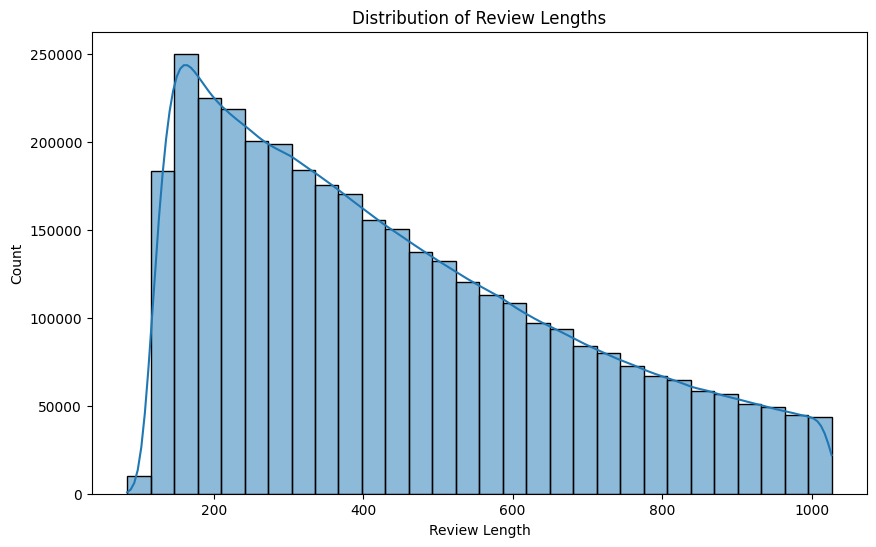

In [ ]:
# Histogram of lengths of the reviews
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()